Customer churn refers to customers discontinuing a service.
Predicting churn helps organizations proactively retain customers and minimize revenue loss.
This project aims to build a machine learning model to predict churn based on customer demographics, service usage, and billing information.

In [1]:
import pandas as pd
import numpy as np


In [2]:
df = pd.read_csv(r"C:\Users\Lalithya Shashikumar\Downloads\cust_churn_project\data\chrnnn.csv")
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.shape


(7043, 21)

In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
df.isnull().sum()


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [6]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')


In [7]:
df.isnull().sum()


customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [8]:
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)


In [9]:
df.duplicated().sum()


0

In [10]:
df['Churn'].value_counts()


No     5174
Yes    1869
Name: Churn, dtype: int64

Day 1 – Dataset Understanding & Cleaning

Observed dataset size and feature types

Identified data quality issues in TotalCharges

Handled missing values using median imputation

Verified absence of duplicate records

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns


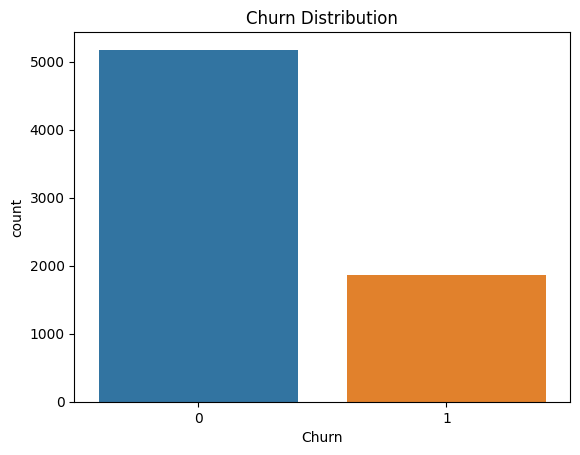

In [26]:
plt.figure()
sns.countplot(x='Churn', data=df)
plt.title("Churn Distribution")
plt.show()


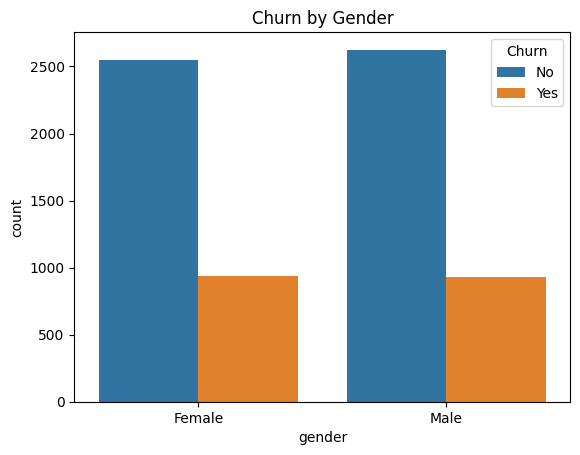

In [13]:
plt.figure()
sns.countplot(x='gender', hue='Churn', data=df)
plt.title("Churn by Gender")
plt.show()


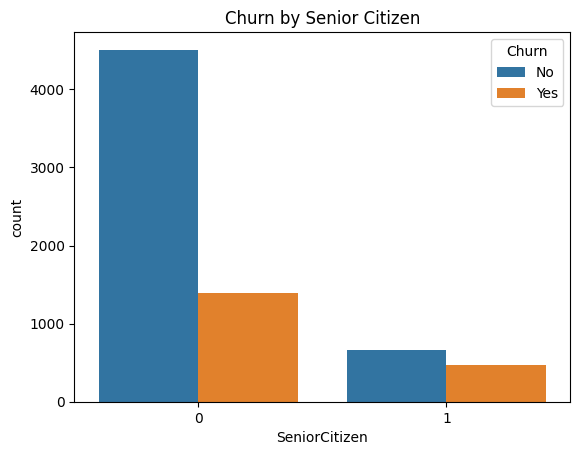

In [14]:
plt.figure()
sns.countplot(x='SeniorCitizen', hue='Churn', data=df)
plt.title("Churn by Senior Citizen")
plt.show()


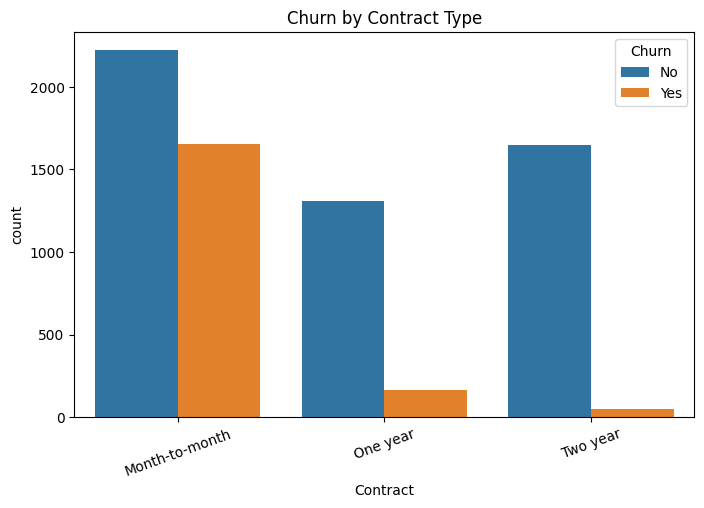

In [15]:
plt.figure(figsize=(8,5))
sns.countplot(x='Contract', hue='Churn', data=df)
plt.title("Churn by Contract Type")
plt.xticks(rotation=20)
plt.show()


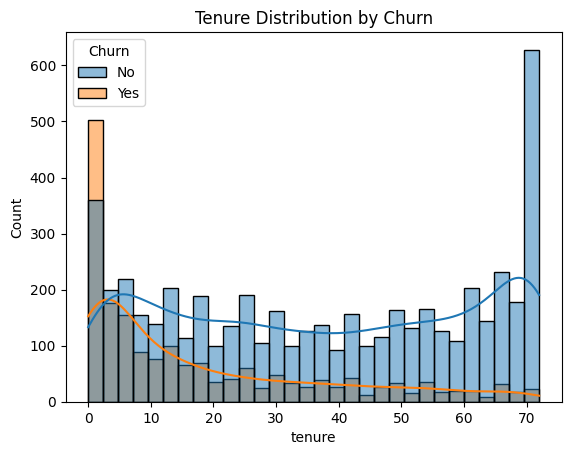

In [16]:
plt.figure()
sns.histplot(data=df, x='tenure', hue='Churn', bins=30, kde=True)
plt.title("Tenure Distribution by Churn")
plt.show()


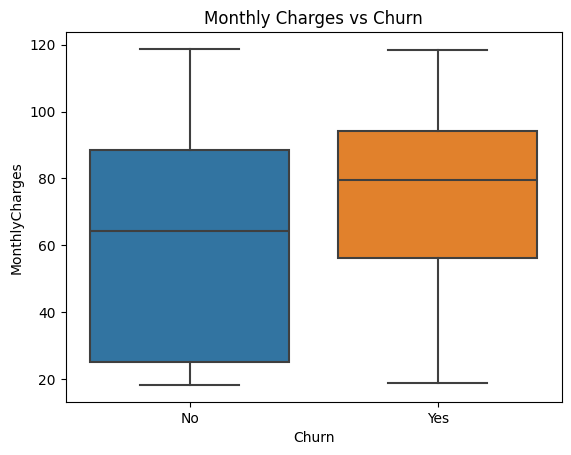

In [17]:
plt.figure()
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.title("Monthly Charges vs Churn")
plt.show()


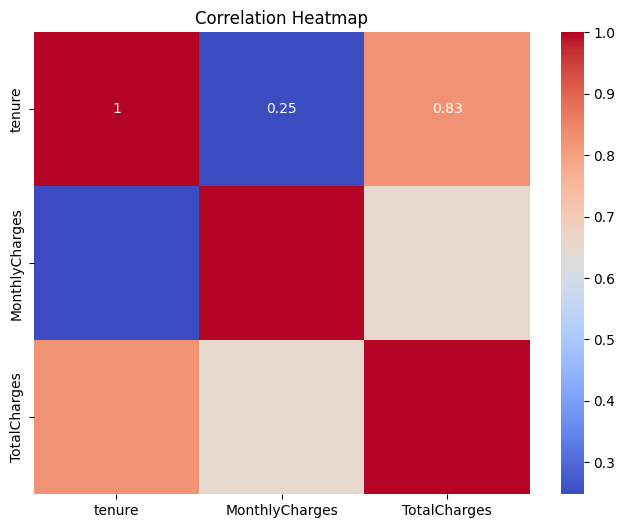

In [18]:
plt.figure(figsize=(8,6))
sns.heatmap(df[['tenure','MonthlyCharges','TotalCharges']].corr(),
            annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


Day 2 – Exploratory Data Analysis

Identified churn distribution imbalance

Found strong churn dependency on contract type and tenure

Visualized customer behavior trends

In [19]:
df.drop('customerID', axis=1, inplace=True)


In [20]:
df['Churn'] = df['Churn'].map({'Yes':1, 'No':0})


In [21]:
categorical_cols = df.select_dtypes(include=['object']).columns
numerical_cols = df.select_dtypes(include=['int64','float64']).columns

print(categorical_cols)
print(numerical_cols)


Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object')
Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'Churn'], dtype='object')


In [22]:
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)


In [23]:
X = df_encoded.drop('Churn', axis=1)
y = df_encoded['Churn']


In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [27]:
print(numerical_cols)
print(X_train.columns)


Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'Churn'], dtype='object')
Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges',
       'gender_Male', 'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')


In [25]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])


KeyError: "['Churn'] not in index"

In [41]:
numerical_cols = [
    'SeniorCitizen',
    'tenure',
    'MonthlyCharges',
    'TotalCharges'
]

numerical_cols


['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']

In [43]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])


In [44]:
X_train[numerical_cols].head()


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
3738,-0.441773,0.102371,-0.521976,-0.263289
3151,-0.441773,-0.711743,0.337478,-0.504814
4860,-0.441773,-0.793155,-0.809013,-0.751213
3867,-0.441773,-0.263980,0.284384,-0.173699
3810,-0.441773,-1.281624,-0.676279,-0.990851


In [45]:
import pickle

with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

print("scaler.pkl saved successfully")


scaler.pkl saved successfully


In [30]:
X_train.shape, X_test.shape


((5634, 30), (1409, 30))

In [31]:
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [33]:
y_pred_log = log_model.predict(X_test)
y_prob_log = log_model.predict_proba(X_test)[:, 1]


In [34]:
y_pred_log[:10]



array([0, 1, 0, 0, 0, 1, 0, 0, 0, 0], dtype=int64)

In [35]:
y_prob_log[:10]


array([0.04536391, 0.683597  , 0.05983011, 0.3996835 , 0.02162515,
       0.60240501, 0.44780669, 0.1291366 , 0.00292232, 0.39596184])

In [36]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(
    max_depth=5,
    random_state=42
)

dt_model.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=5, random_state=42)

In [37]:
y_pred_dt = dt_model.predict(X_test)
y_prob_dt = dt_model.predict_proba(X_test)[:, 1]


In [38]:
y_pred_dt[:10]


array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [39]:
y_prob_dt[:10]


array([0.        , 0.75087719, 0.1027668 , 0.33793103, 0.00981595,
       0.3220339 , 0.3220339 , 0.03010033, 0.00981595, 0.03010033])

Day 4 – Model Building

Built Logistic Regression and Decision Tree models

Understood model assumptions and behavior

In [ ]:
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report,
    roc_auc_score,
    roc_curve
)


In [ ]:
print("Logistic Regression Metrics")
print("Accuracy :", accuracy_score(y_test, y_pred_log))
print("Precision:", precision_score(y_test, y_pred_log))
print("Recall   :", recall_score(y_test, y_pred_log))
print("F1-score :", f1_score(y_test, y_pred_log))
print("ROC-AUC  :", roc_auc_score(y_test, y_prob_log))


In [ ]:
cm_log = confusion_matrix(y_test, y_pred_log)
cm_log


In [ ]:
plt.figure()
sns.heatmap(cm_log, annot=True, fmt='d')
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [ ]:
print("Decision Tree Metrics")
print("Accuracy :", accuracy_score(y_test, y_pred_dt))
print("Precision:", precision_score(y_test, y_pred_dt))
print("Recall   :", recall_score(y_test, y_pred_dt))
print("F1-score :", f1_score(y_test, y_pred_dt))
print("ROC-AUC  :", roc_auc_score(y_test, y_prob_dt))


In [ ]:
cm_dt = confusion_matrix(y_test, y_pred_dt)
cm_dt


In [ ]:
plt.figure()
sns.heatmap(cm_dt, annot=True, fmt='d')
plt.title("Confusion Matrix - Decision Tree")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [ ]:
fpr_log, tpr_log, _ = roc_curve(y_test, y_prob_log)
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_prob_dt)

plt.figure()
plt.plot(fpr_log, tpr_log, label="Logistic Regression")
plt.plot(fpr_dt, tpr_dt, label="Decision Tree")
plt.plot([0,1], [0,1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.show()


In [ ]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(
    log_model,
    X_train,
    y_train,
    cv=5,
    scoring='recall'
)

cv_scores.mean()


In [ ]:
best_model = log_model


In [ ]:
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': log_model.coef_[0]
})

feature_importance['Abs_Coefficient'] = feature_importance['Coefficient'].abs()
feature_importance = feature_importance.sort_values(
    by='Abs_Coefficient', ascending=False
)

feature_importance.head(10)


In [ ]:
top_features = feature_importance.head(10)

plt.figure(figsize=(8,5))
sns.barplot(
    x='Coefficient',
    y='Feature',
    data=top_features
)
plt.title("Top Factors Influencing Customer Churn")
plt.show()


In [ ]:
churn_reasons = [
    "Customers with month-to-month contracts are more likely to churn",
    "Higher monthly charges increase churn probability",
    "Low tenure customers churn more frequently",
    "Electronic check payment method shows higher churn",
    "Fiber optic internet users show higher churn"
]

churn_reasons


Day 6 – Model Explainability

Identified top churn-influencing features

Translated model outputs into business insights

In [ ]:
import pickle

with open("model.pkl", "wb") as file:
    pickle.dump(log_model, file)


In [ ]:
with open("scaler.pkl", "wb") as file:
    pickle.dump(scaler, file)


In [ ]:
import streamlit as st
import pandas as pd
import pickle

# Load model and scaler
model = pickle.load(open("model.pkl", "rb"))
scaler = pickle.load(open("scaler.pkl", "rb"))

st.title("Customer Churn Prediction App")

st.write("Enter customer details to predict churn probability")

# User inputs
tenure = st.slider("Tenure (months)", 0, 72, 12)
monthly_charges = st.number_input("Monthly Charges", 0.0, 200.0, 70.0)
total_charges = st.number_input("Total Charges", 0.0, 10000.0, 2000.0)

# Minimal input dataframe (demo version)
input_data = pd.DataFrame({
    'tenure': [tenure],
    'MonthlyCharges': [monthly_charges],
    'TotalCharges': [total_charges]
})

# Scale input
input_data[['tenure','MonthlyCharges','TotalCharges']] = scaler.transform(
    input_data[['tenure','MonthlyCharges','TotalCharges']]
)

# Prediction
if st.button("Predict Churn"):
    prob = model.predict_proba(input_data)[0][1]
    st.success(f"Churn Probability: {prob:.2f}")

    if prob > 0.5:
        st.warning("High risk of customer churn")
    else:
        st.info("Low risk of churn")


In [ ]:
import pickle

# Save feature names used for training
features = X_train.columns.tolist()

with open("features.pkl", "wb") as f:
    pickle.dump(features, f)

print("features.pkl saved successfully")


In [40]:
X_train.columns


Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges',
       'gender_Male', 'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [47]:
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
accuracy


0.8055358410220014

In [48]:
import pickle

with open("model.pkl", "wb") as f:
    pickle.dump(model, f)

print("model.pkl saved")


model.pkl saved


In [49]:
model.predict(X_test[:5])


array([0, 1, 0, 0, 0], dtype=int64)

In [50]:
import pickle

features = X_train.columns.tolist()

with open("features.pkl", "wb") as f:
    pickle.dump(features, f)

print("features.pkl saved")


features.pkl saved
